In [4]:
!pip install tensorflowjs
!pip install os pathlib pandas numpy seaborn matplotlib opencv-python shutil random tensorflow tensorflowjs pillow keras tensorflow-hub scikit-learn|

The syntax of the command is incorrect.


In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import shutil
import random
import tensorflow as tf

from PIL import Image
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation, GlobalMaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras import Input, Model
from tensorflow.keras.utils import plot_model

In [2]:
data_dir = pathlib.Path(r'D:\Users\Yongyong\Documents\School\3rd Year 2nd Sem\Capstone\DenseNet169\data')
train_dir = r'D:\Users\Yongyong\Documents\School\3rd Year 2nd Sem\Capstone\DenseNet169\data\train'
val_dir = r'D:\Users\Yongyong\Documents\School\3rd Year 2nd Sem\Capstone\DenseNet169\data\val'
test_dir = r'D:\Users\Yongyong\Documents\School\3rd Year 2nd Sem\Capstone\DenseNet169\data\test'

In [3]:
print(len(train_dir))

83


In [4]:
# Show classes
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['test' 'train' 'val']


In [5]:
# Show total data in folder
for dirpath, dirnames, filenames in os.walk('crab'):
  print(f"{len(dirnames)} folder and {len(filenames)} images in {dirpath}")

In [6]:
# Sets the global random seed.
tf.random.set_seed(46)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   rotation_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   vertical_flip=True,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)


In [7]:
# flow from directory using datagen (Pipeline)
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=46)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=46)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=46)

Found 1598 images belonging to 4 classes.
Found 457 images belonging to 4 classes.
Found 229 images belonging to 4 classes.


In [8]:
# Check class_indices
train_data.class_indices

{'col': 0, 'healthy': 1, 'mas': 2, 'str': 3}

In [9]:
# Set labels
train_y=train_data.classes
val_y=valid_data.classes
test_y=test_data.classes


In [10]:
base_model = DenseNet169(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3))
base_model.trainable = False

In [11]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model

from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.optimizers import Adam

# Define input shape
inputs = Input(shape=(224, 224, 3))

# Add base model (DenseNet169)
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Add new layers
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Additional dense layer
x = Dense(512, activation='relu')(x)  # Increased complexity
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Another dense layer
x = Dense(256, activation='relu')(x)  # Further complexity
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Final output layer
outputs = Dense(4, activation='softmax')(x)

# Create model
model = Model(inputs, outputs)

In [12]:
# Model Summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 global_average_pooling2d (  (None, 1664)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 1664)              6656      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1664)              0         
                                                                 
 dense (Dense)               (None, 512)               852480

In [13]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# train model
history = model.fit(train_data, epochs=10, validation_data=valid_data)


Epoch 1/10


100/100 [==============================] - 146s 1s/step - loss: 1.0457 - accuracy: 0.6696 - val_loss: 0.3010 - val_accuracy: 0.9059
Epoch 2/10
100/100 [==============================] - 130s 1s/step - loss: 0.5863 - accuracy: 0.8166 - val_loss: 0.2626 - val_accuracy: 0.9147
Epoch 3/10
100/100 [==============================] - 114s 1s/step - loss: 0.5162 - accuracy: 0.8304 - val_loss: 0.1852 - val_accuracy: 0.9431
Epoch 4/10
100/100 [==============================] - 103s 1s/step - loss: 0.3910 - accuracy: 0.8623 - val_loss: 0.1560 - val_accuracy: 0.9540
Epoch 5/10
100/100 [==============================] - 107s 1s/step - loss: 0.4153 - accuracy: 0.8636 - val_loss: 0.1358 - val_accuracy: 0.9519
Epoch 6/10
100/100 [==============================] - 121s 1s/step - loss: 0.3977 - accuracy: 0.8661 - val_loss: 0.1232 - val_accuracy: 0.9584
Epoch 7/10
100/100 [==============================] - 114s 1s/step - loss: 0.3260 - accuracy: 0.8811 - val_loss: 0.1163 - val_accuracy: 0.95

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [15]:
# Function for showing plot of model
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    plt.figure()
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title("Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title("Accuracy Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()



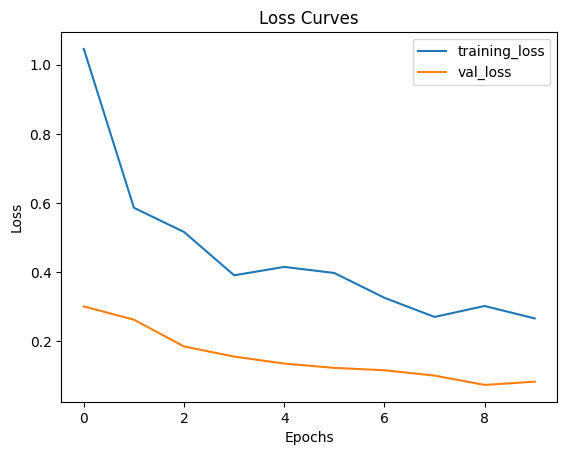

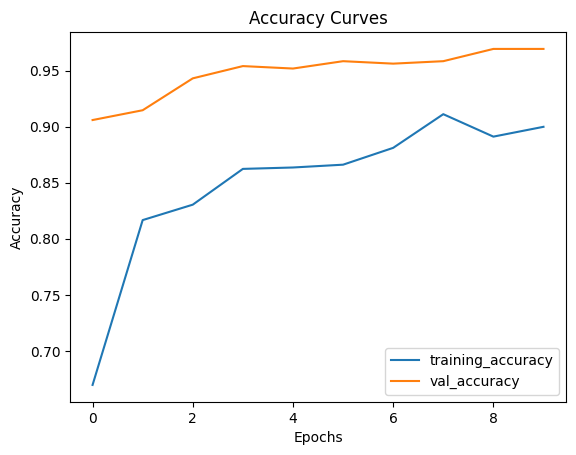

In [16]:
plot_loss_curves(history)

In [17]:
# classification report
val_pred = model.predict(valid_data)
val_pred = val_pred.argmax(axis=1)
print(classification_report(val_pred, val_y, zero_division=1))

29/29 [==============================] - 33s 1s/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       1.00      0.96      0.98       146
           2       0.96      0.97      0.97       120
           3       0.93      0.98      0.95       113

    accuracy                           0.97       457
   macro avg       0.97      0.97      0.97       457
weighted avg       0.97      0.97      0.97       457



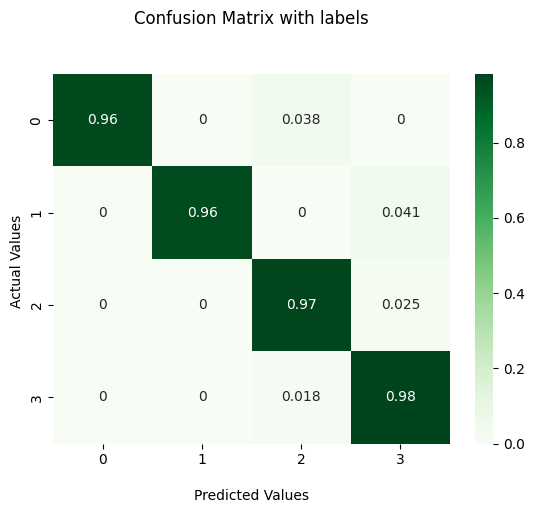

In [18]:
# confusion matrix
cfm_val = confusion_matrix(val_pred, val_y, normalize='true')
ax = sns.heatmap(cfm_val, annot=True,
            cmap='Greens')

# Preparation for plotting confusion matrix
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [19]:
# classification report
test_pred = model.predict(test_data)
test_pred = test_pred.argmax(axis=1)
print(classification_report(test_pred, test_y))

15/15 [==============================] - 15s 998ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       1.00      0.95      0.97        74
           2       0.95      0.97      0.96        60
           3       0.90      1.00      0.95        54

    accuracy                           0.96       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.96      0.96      0.96       229



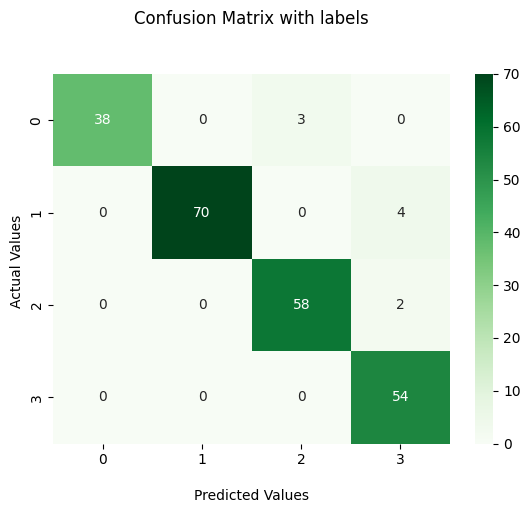

15/15 [==============================] - 15s 971ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       1.00      0.95      0.97        74
           2       0.95      0.97      0.96        60
           3       0.90      1.00      0.95        54

    accuracy                           0.96       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.96      0.96      0.96       229



In [20]:
# confusion matrix
cfm_test = confusion_matrix(test_pred, test_y)
ax = sns.heatmap(cfm_test, annot=True,
            cmap='Greens')

# Preparation for plotting confusion matrix
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

# classification report
test_pred = model.predict(test_data)
test_pred = test_pred.argmax(axis=1)
print(classification_report(test_pred, test_y))


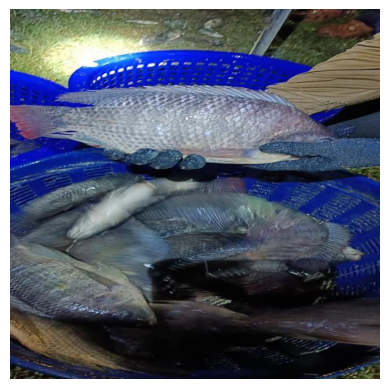

1/1 [==============================] - 3s 3s/step
Predicted class: col


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image dimensions
img_height, img_width = 224, 224

# Load and preprocess the image
image_path = 'D:/Users/Yongyong/Documents/School/3rd Year 2nd Sem/Capstone/DenseNet169/data/test/col/rt-19-_jpg.rf.bd92bc4eef8a53a72b2a466c65d57a42.jpg'  # Replace with the actual path to your image
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (img_height, img_width))
image_normalized = image_resized / 255.0  # Normalize pixel values
image_expanded = np.expand_dims(image_normalized, axis=0)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

# Make a prediction
pred = model.predict(image_expanded)

# Convert the prediction to a class label
class_indices = {v: k for k, v in train_data.class_indices.items()}  # Get class indices from your training data
predicted_class = class_indices[np.argmax(pred)]
print(f'Predicted class: {predicted_class}')